In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv('all_month.csv')
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-01-14T02:30:08.190Z,38.814335,-122.821999,2.47,0.75,md,18.0,53.0,0.007827,0.02,...,2022-01-14T02:31:46.240Z,"7km NW of The Geysers, CA",earthquake,0.24,0.73,0.22,3.0,automatic,nc,nc
1,2022-01-14T02:25:14.630Z,33.823833,-118.284833,8.91,1.52,ml,21.0,64.0,0.059360,0.24,...,2022-01-14T02:29:09.803Z,"1km SSW of Carson, CA",earthquake,0.43,0.86,0.17,29.0,automatic,ci,ci
2,2022-01-14T02:24:29.520Z,40.027000,-123.747002,15.45,2.52,md,18.0,112.0,0.142900,0.13,...,2022-01-14T02:26:10.867Z,"12km SSE of Redway, CA",earthquake,0.55,0.69,0.10,15.0,automatic,nc,nc
3,2022-01-14T02:20:31.850Z,38.824165,-122.804169,2.52,0.69,md,18.0,63.0,0.004676,0.01,...,2022-01-14T02:22:06.564Z,"7km NW of The Geysers, CA",earthquake,0.23,0.59,0.48,3.0,automatic,nc,nc
4,2022-01-14T02:19:10.470Z,40.854500,-122.376335,4.36,1.45,md,6.0,310.0,0.256700,0.09,...,2022-01-14T02:27:10.172Z,"19km N of Shasta Lake, CA",earthquake,8.02,10.34,0.18,5.0,automatic,nc,nc


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9177 entries, 0 to 9176
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9177 non-null   object 
 1   latitude         9177 non-null   float64
 2   longitude        9177 non-null   float64
 3   depth            9177 non-null   float64
 4   mag              9174 non-null   float64
 5   magType          9174 non-null   object 
 6   nst              6681 non-null   float64
 7   gap              7664 non-null   float64
 8   dmin             6288 non-null   float64
 9   rms              9176 non-null   float64
 10  net              9177 non-null   object 
 11  id               9177 non-null   object 
 12  updated          9177 non-null   object 
 13  place            9177 non-null   object 
 14  type             9177 non-null   object 
 15  horizontalError  6842 non-null   float64
 16  depthError       9177 non-null   float64
 17  magError      

In [4]:
data.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

# Null value handling

In [5]:
for i in ['mag', 'nst','gap', 'dmin', 'rms','magError','horizontalError']:
    data[i]=data[i].fillna(data[i].median())

In [6]:
data['magType'].fillna("ml",inplace=True)

In [7]:
data=data.drop(['magNst'],axis=1)

In [8]:
data.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
status             0
locationSource     0
magSource          0
dtype: int64

In [9]:
import re
data['short place']=[re.findall(r'\w+',i)[-1] for i in data['place']]
features=[i for i in data.columns if data[i].isna().sum()==0] 
features
for i in ['mag','place','time','updated','net','magType','depth']:
    features.remove(i)

# Label Encoding

In [10]:
categorical=[]
for i in features:
    if data[i].dtype=="object":
        categorical.append(i

In [11]:
categorical

['id', 'type', 'status', 'locationSource', 'magSource', 'short place']

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x=data[features]
y=data[['mag','depth', 'depthError']]
for i in categorical:
    x[i]=le.fit_transform(x[i])
for i in [i for i in y.columns if y[i].dtype=='object']:
    y[i]=le.fit_transform(y[i])

<ipython-input-12-deaafda475a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i]=le.fit_transform(x[i])


# Exploratory Analysis

Text(0.5, 0, 'magType')

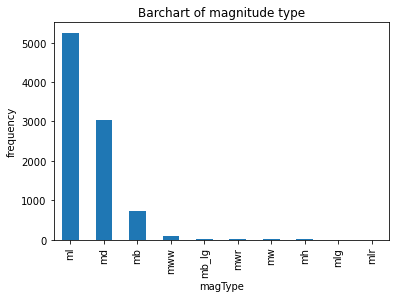

In [49]:
dd=data['magType'].value_counts()
dd.plot(kind='bar')
plt.title('Barchart of magnitude type')
plt.ylabel('frequency')
plt.xlabel('magType')

most of the earthquakes are of ml type

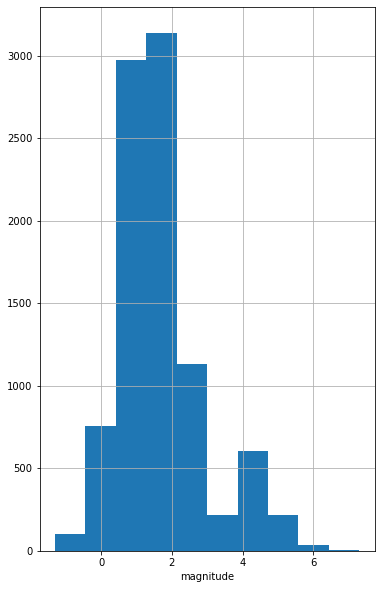

In [15]:
freqgraph=data['mag']
freqgraph.hist(figsize=(6,10))
plt.xlabel('magnitude')
plt.show()

most of the magnituse is between 0.5 to 2

Text(0.5, 1.0, 'magnitude v/s depth')

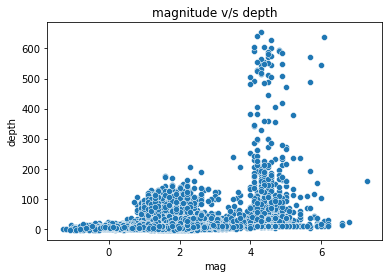

In [17]:
sns.scatterplot(x='mag',y='depth',data=data)
plt.title("magnitude v/s depth")

Above 300km, the  magnitudes are greater than or equal to 4 degrees

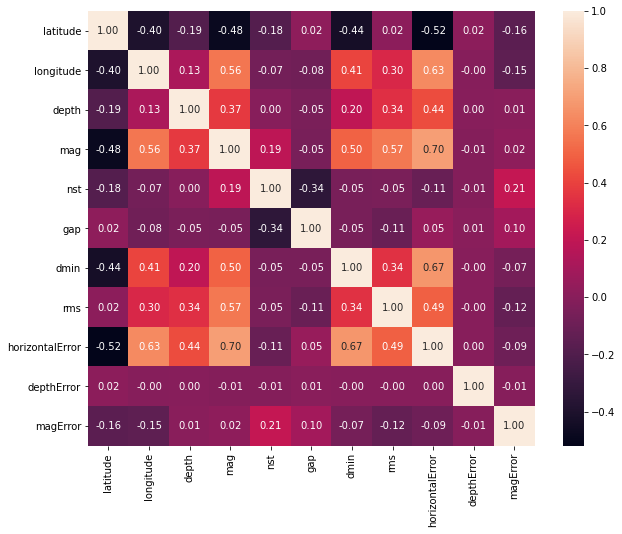

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(data=data.corr(),cmap='rocket',annot=True,fmt='.2f')
plt.show()

# Modelling

# Linear Regression

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

array([[ 1.2499813 ,  1.4450265 ,  2.2       ],
       [ 4.99192303, 97.62699761,  6.7       ],
       [ 0.7694885 ,  4.50941408,  0.45      ],
       ...,
       [ 0.64667854,  6.53396176,  0.32      ],
       [ 1.28776873, 17.89664407,  0.59      ],
       [ 1.63638505, 11.04144945,  0.77      ]])

# KNN

In [26]:
from sklearn.multioutput import MultiOutputRegressor 
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn=MultiOutputRegressor(knnmodel)
knn.fit(x_train,y_train)


MultiOutputRegressor(estimator=KNeighborsRegressor())

In [38]:
y_pred=knn.predict(x_test)

# SVM

In [29]:
from sklearn.svm import LinearSVR
svm_linear=LinearSVR()
svm_linear=MultiOutputRegressor(svm_linear)
svm_linear.fit(x_train,y_train)

C:\Users\aneet\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\aneet\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


MultiOutputRegressor(estimator=LinearSVR())

In [37]:
y_pred=svm_linear.predict(x_test)
y_pred

array([[  2.96600394, -13.74884585,   2.20007115],
       [  5.78986459,  27.81568646,   6.70074144],
       [  2.11614989,  -2.54283668,   0.45015441],
       ...,
       [  1.71120411,   2.90692383,   0.32002502],
       [  2.26772358,  -1.11769155,   0.59000391],
       [  2.41510631,   2.08367224,   0.77025282]])

# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
y_pred=dt.predict(x_test)
y_pred

array([[  1.6 ,   7.3 ,   2.2 ],
       [  4.4 , 193.6 ,   7.  ],
       [  0.54,   1.4 ,   0.48],
       ...,
       [  0.91,   4.43,   0.31],
       [  1.55,   9.72,   0.7 ],
       [  1.18,   7.54,   0.46]])

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
clf = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
clf.fit(x_train, y_train)

RandomForestRegressor()

In [35]:
y_pred=clf.predict(x_test)
y_pred

array([[  1.4483,   8.3291,   2.1969],
       [  4.3796, 133.7482,   6.9885],
       [  0.6824,   1.205 ,   0.5669],
       ...,
       [  0.9465,   3.6541,   0.311 ],
       [  1.4935,   9.6507,   0.6016],
       [  1.3882,   6.8771,   0.7442]])

# Model fine tuning

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
print(cross_val_score(lr, x, y, cv=5).mean())

0.6556576505582725


In [43]:
print(cross_val_score(knn, x, y, cv=5).mean())

0.3454851891826874


In [44]:
print(cross_val_score(svm_linear, x, y, cv=5).mean())

C:\Users\aneet\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\aneet\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\aneet\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\aneet\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\aneet\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

-3.133288237548805


C:\Users\aneet\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [45]:
print(cross_val_score(dt, x, y, cv=5).mean())

0.6702043700637159


In [46]:
print(cross_val_score(clf, x, y, cv=5).mean())

0.7909168840171473


In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(clf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(x_train, y_train)
print(cross_val_score(grid_search_forest.best_estimator_, x, y, cv=5).mean())

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [ ]:
Cross validation value is more for random forest regressor, Therefore it is the best regressor.